# Number 1:

As per usual, we import packages and some specific modules that will be used for this assignment.

In [2]:
import numpy as np
from astropy.io import fits
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.visualization import hist
import ccdproc as ccdp
from matplotlib import rc
from datetime import datetime
from astropy.nddata import CCDData
from astropy.stats import mad_std

phot_tutorial_dir ="/Users/jonathanrodriguez/Documents/ASTR8060/repos/phot_tutorial/ccd-reduction-and-photometry-guide/notebooks/"
import sys
sys.path.insert(0,phot_tutorial_dir)
from convenience_functions import show_image

plt.style.use(phot_tutorial_dir+'/guide.mplstyle')

# Set some default parameters for the plots below
rc('font', size=12)
rc('axes', grid=True)

In [3]:
from astropy.modeling import fitting
from astropy.modeling.models import Polynomial1D,Chebyshev1D,Legendre1D

The untouched data from the log.txt file will remain in the "Imaging" directory, while the data we will be manipulating is in the "Reductions1" directory. Their respective variable names are labeled. 

In [4]:
data_dir = '/Users/jonathanrodriguez/Documents/ASTR8060/Imaging'
reduced_dir = '/Users/jonathanrodriguez/Documents/ASTR8060/Reductions1'

## Opening the fits files, assigning keywords, and overwriting the files

The next few cells involve loading each individual image type (biases, flats, darks, and science) in each of their respective filters (H-Alpha, U, B, V, R, I). 

In [5]:
bias_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(19)+(93)] 
hdus = [fits.open(file) for file in bias_files] #opening the fits files
hdrs = [hdu[0].header for hdu in hdus] #storing the header information
biases = [hdu[0].data for hdu in hdus] #storing the data

In [6]:
for i in range(np.size(hdus)):
    print(i) #this shows that the for loop is iterating across the correct number. 
    hdrs[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs[i]['FILTER'] = 'None'
    hdrs[i]['IMAGETYP'] = 'Bias'

     
    hdus[i].writeto(bias_files[i], overwrite = True)
    
del hdus # hdus take a lot of memory, so we delete these two after running the keywords. 
del hdrs

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [119]:
flat_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(16)+(5)] 
flat_files
hdus1 = [fits.open(file) for file in flat_files]
hdrs1 = [hdu[0].header for hdu in hdus1]
flats = [hdu[0].data for hdu in hdus1]

In [120]:
for i in range(np.size(hdus1)):
    print(i) 
    hdrs1[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs1[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs1[i]['FILTER'] = 'halpha'
    hdrs1[i]['IMAGETYP'] = 'skyflat'
    hdus1[i].writeto(flat_files[i], overwrite = True)
    
del hdus1 
del hdrs1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [11]:
v_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(7)+(43)] 
v_files
hdus2 = [fits.open(file) for file in v_files]
hdrs2 = [hdu[0].header for hdu in hdus2]
vflats = [hdu[0].data for hdu in hdus2]

In [12]:
for i in range(np.size(hdus2)):
    print(i) 
    hdrs2[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs2[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs2[i]['FILTER'] = 'V'
    hdrs2[i]['IMAGETYP'] = 'skyflat'
    hdus2[i].writeto(v_files[i], overwrite = True)
    
del hdus2 
del hdrs2

0
1
2
3
4
5
6


In [122]:
b_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(14)+(29)] 
b_files
hdus2 = [fits.open(file) for file in b_files]
hdrs2 = [hdu[0].header for hdu in hdus2]
bflats = [hdu[0].data for hdu in hdus2]

In [123]:
for i in range(np.size(hdus2)):
    print(i) 
    hdrs2[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs2[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs2[i]['FILTER'] = 'B'
    hdrs2[i]['IMAGETYP'] = 'skyflat'
    hdus2[i].writeto(b_files[i], overwrite = True)
    
del hdus2 
del hdrs2

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [124]:
u_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(8)+(21)] 
u_files
hdus2 = [fits.open(file) for file in u_files]
hdrs2 = [hdu[0].header for hdu in hdus2]
uflats = [hdu[0].data for hdu in hdus2]

In [125]:
for i in range(np.size(hdus2)):
    print(i) 
    hdrs2[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs2[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs2[i]['FILTER'] = 'U'
    hdrs2[i]['IMAGETYP'] = 'skyflat'
    hdus2[i].writeto(u_files[i], overwrite = True)
    
del hdus2 
del hdrs2

0
1
2
3
4
5
6
7


In [126]:
r_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(6)+(50)] 
r_files
hdus2 = [fits.open(file) for file in r_files]
hdrs2 = [hdu[0].header for hdu in hdus2]
rflats = [hdu[0].data for hdu in hdus2]

In [127]:
for i in range(np.size(hdus2)):
    print(i) 
    hdrs2[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs2[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs2[i]['FILTER'] = 'R'
    hdrs2[i]['IMAGETYP'] = 'skyflat'
    hdus2[i].writeto(r_files[i], overwrite = True)
    
del hdus2 
del hdrs2

0
1
2
3
4
5


In [128]:
i_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(6)+(57)] 
i_files
hdus2 = [fits.open(file) for file in i_files]
hdrs2 = [hdu[0].header for hdu in hdus2]
iflats = [hdu[0].data for hdu in hdus2]

In [129]:
for i in range(np.size(hdus2)):
    print(i) 
    hdrs2[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs2[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs2[i]['FILTER'] = 'I'
    hdrs2[i]['IMAGETYP'] = 'skyflat'
    hdus2[i].writeto(i_files[i], overwrite = True)
    
del hdus2 
del hdrs2

0
1
2
3
4
5


In [14]:
dark_files = [reduced_dir+'/d'+str(i).zfill(3)+'.fits' for i in np.arange(15)+(1)] 
dark_files
hdus3 = [fits.open(file) for file in dark_files]
hdrs3 = [hdu[0].header for hdu in hdus3]
darks = [hdu[0].data for hdu in hdus3]

In [15]:
for i in range(np.size(hdus3)):
    print(i) 
    hdrs3[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs3[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs3[i]['FILTER'] = 'none'
    hdrs3[i]['IMAGETYP'] = 'darks'
    hdus3[i].writeto(dark_files[i], overwrite = True)
    
del hdus3 
del hdrs3

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [132]:
PG1633V_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(7)+(74)]  
PG1633V_files
hdus4 = [fits.open(file) for file in PG1633V_files]
hdrs4 = [hdu[0].header for hdu in hdus4]
PG1633V = [hdu[0].data for hdu in hdus4]

In [133]:
for i in range(np.size(hdus4)):
    print(i) 
    hdrs4[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs4[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs4[i]['FILTER'] = 'V'
    hdrs4[i]['IMAGETYP'] = 'science'
    hdus4[i].writeto(PG1633V_files[i], overwrite = True)
    
del hdus4 
del hdrs4

0
1
2
3
4
5
6


In [134]:
PG1633U_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(2)+(81)] 
PG1633U_files
hdus4 = [fits.open(file) for file in PG1633U_files]
hdrs4 = [hdu[0].header for hdu in hdus4]
PG1633U = [hdu[0].data for hdu in hdus4]

In [135]:
for i in range(np.size(hdus4)):
    print(i) 
    hdrs4[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs4[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs4[i]['FILTER'] = 'U'
    hdrs4[i]['IMAGETYP'] = 'science'
    hdus4[i].writeto(PG1633U_files[i], overwrite = True)
    
del hdus4 
del hdrs4

0
1


In [136]:
PG1633B_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(2)+(83)] 
PG1633B_files
hdus4 = [fits.open(file) for file in PG1633B_files]
hdrs4 = [hdu[0].header for hdu in hdus4]
PG1633B = [hdu[0].data for hdu in hdus4]

In [137]:
for i in range(np.size(hdus4)):
    print(i) 
    hdrs4[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs4[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs4[i]['FILTER'] = 'B'
    hdrs4[i]['IMAGETYP'] = 'science'
    hdus4[i].writeto(PG1633B_files[i], overwrite = True)
    
del hdus4 
del hdrs4

0
1


In [138]:
PG1633V1_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(2)+(85)] 
PG1633V1_files
hdus4 = [fits.open(file) for file in PG1633V1_files]
hdrs4 = [hdu[0].header for hdu in hdus4]
PG1633V1 = [hdu[0].data for hdu in hdus4]

In [139]:
for i in range(np.size(hdus4)):
    print(i) 
    hdrs4[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs4[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs4[i]['FILTER'] = 'V'
    hdrs4[i]['IMAGETYP'] = 'science'
    hdus4[i].writeto(PG1633V1_files[i], overwrite = True)
    
del hdus4 
del hdrs4

0
1


In [140]:
PG1633R_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(2)+(87)] 
PG1633R_files
hdus4 = [fits.open(file) for file in PG1633R_files]
hdrs4 = [hdu[0].header for hdu in hdus4]
PG1633R = [hdu[0].data for hdu in hdus4]

In [141]:
for i in range(np.size(hdus4)):
    print(i) 
    hdrs4[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs4[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs4[i]['FILTER'] = 'R'
    hdrs4[i]['IMAGETYP'] = 'science'
    hdus4[i].writeto(PG1633R_files[i], overwrite = True)
    
del hdus4 
del hdrs4

0
1


In [142]:
PG1633I_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(2)+(89)] 
PG1633I_files
hdus4 = [fits.open(file) for file in PG1633I_files]
hdrs4 = [hdu[0].header for hdu in hdus4]
PG1633I = [hdu[0].data for hdu in hdus4]

In [143]:
for i in range(np.size(hdus4)):
    print(i) 
    hdrs4[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs4[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs4[i]['FILTER'] = 'I'
    hdrs4[i]['IMAGETYP'] = 'science'
    hdus4[i].writeto(PG1633I_files[i], overwrite = True)
    
del hdus4 
del hdrs4

0
1


In [144]:
PG1633halpha_files = [reduced_dir+'/a'+str(i).zfill(3)+'.fits' for i in np.arange(2)+(91)] 
PG1633halpha_files
hdus4 = [fits.open(file) for file in PG1633halpha_files]
hdrs4 = [hdu[0].header for hdu in hdus4]
PG1633halpha = [hdu[0].data for hdu in hdus4]

In [145]:
for i in range(np.size(hdus4)):
    print(i) 
    hdrs4[i]['BIASSEC'] = '[2102:2200, 0:2048]'
    hdrs4[i]['TRIMSEC'] = '[51:2102, 0:2048]'  
    hdrs4[i]['FILTER'] = 'halpha'
    hdrs4[i]['IMAGETYP'] = 'science'
    hdus4[i].writeto(PG1633halpha_files[i], overwrite = True)
    
del hdus4 
del hdrs4

0
1


It should be noted that after all these files were properly placed, I deleted individual files that were labeled as "bad", or I percieved would negatively impact this homework analysis. 

## Subtracting the overscan region and trimming the images

Each image comes with an overscan region which needs to be removed. We use "ImageFileCollection" to collect all of the fits files in one location. Then, we run a for loop iterating over each file and use ccdproc functions in order to remove the overscan regions and trim the image to just contain the "trimsec" region. We then save these overscan  and trimsec corrected images as "ot.fits" files. 

In [148]:
imgs = ccdp.ImageFileCollection(reduced_dir,glob_include='*.fits')

In [149]:
for ccd, file_name in imgs.ccds(ccd_kwargs = {'unit': 'adu'}, return_fname = True):
    ccd = ccdp.subtract_overscan(ccd, overscan = ccd[:, :2101], median = True) #the overscan region spans all rows, and begins on column 2101.
    ccd = ccdp.trim_image(ccd[:, 54:2101]) #the trimmed image will span all rows, and be from columns 54 to 2101.
    outfile = file_name.strip('.fits')+'ot.fits'
    ccd.write(reduced_dir + outfile, overwrite = True)

## Master bias image

Here, we are combining all bias images to create one "master" bias image. This master bias image will be subtracted from all files in an effort to reduce image noise. 

In [150]:
imgs_ot = ccdp.ImageFileCollection(reduced_dir,glob_include='*ot.fits')

In [151]:
calibrated_biases = imgs_ot.files_filtered(imagetyp='bias', include_path=True) #this takes all bias images from the ot.fits files

combined_bias = ccdp.combine(calibrated_biases,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            ) #ccdp.combine has many attributes. Most importantly, we are clipping up to 5-sigma. 

combined_bias.meta['combined'] = True

combined_bias.write(reduced_dir+'combined_bias.fit', overwrite = True) #this produces the master bias file

INFO:astropy:splitting each image into 11 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 11 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


read in the master
read in one file
(both as.data)
literally subtract them
then plot the result

## Subtracting the master bias from one science image

Just as proof of concept, we will be subtracting the master bias data from one science image. This should improve image quality, as some noise is being removed from the science image. 

In [152]:
master_bias = '/Users/jonathanrodriguez/Documents/ASTR8060/Reductions1combined_bias.fit'

Done below, we open the master bias and science files. 

In [153]:
hdus4 = fits.open(master_bias)
hdrs4 = hdus4[0].header
master_bias1 = hdus4[0].data

del hdus4
del hdrs4

In [154]:
print(np.shape(master_bias1)) #(1, 2048, 2047)

(2048, 2047)


In [155]:
science_for_subtraction = '/Users/jonathanrodriguez/Documents/ASTR8060/Reductions1/Reductions1a081ot.fits'

In [156]:
hdus6 = fits.open(science_for_subtraction)
hdrs6 = hdus6[0].header
science_for_subtraction1 = hdus6[0].data

del hdus6
del hdrs6

In [157]:
print(np.shape(science_for_subtraction1))

(2048, 2047)


In [158]:
science_subtracted = science_for_subtraction1-master_bias1 #subtracting the actual data

In [159]:
print(np.shape(science_subtracted))

(2048, 2047)


Plot the resulting bias subtracted science image. 

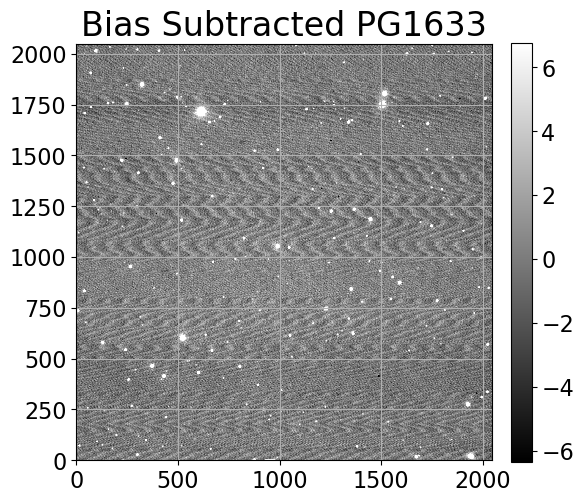

In [236]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
show_image(science_subtracted, cmap='gray', ax=ax, fig=fig)
ax.set_title("Bias Subtracted PG1633") # index filename to exclude long directory
plt.tight_layout()
plt.show()

Now that we have proved that this works, we will use ImageFileCollection in order to subtract the master bias from all images. These files will now officially be overscan, trim, and bias corrected. 

In [171]:
imgs_a = ccdp.ImageFileCollection(reduced_dir, glob_include='*ot.fits')

for ccd, file_name in imgs_a.ccds(ccd_kwargs={'unit': 'adu'}, return_fname=True):
    sub = ccd.data-master_bias1
    outfile = file_name.strip('.fits')+'otz.fits'
    ccd.write(reduced_dir + outfile, overwrite=True)

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


# Number 2:

We will be examining our V flats for this problem. We will pull our corrected V flats and plot them to see if there are any artifacts. 

In [184]:
v_files_a = imgs_a.files_filtered(imagetyp='skyflat',filter='V',include_path=True)
print(np.shape(v_files_a))

(7,)


Below we will read in each file and plot the images. Artifacts can be seen in some of the images.

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(7, 2048, 2047)


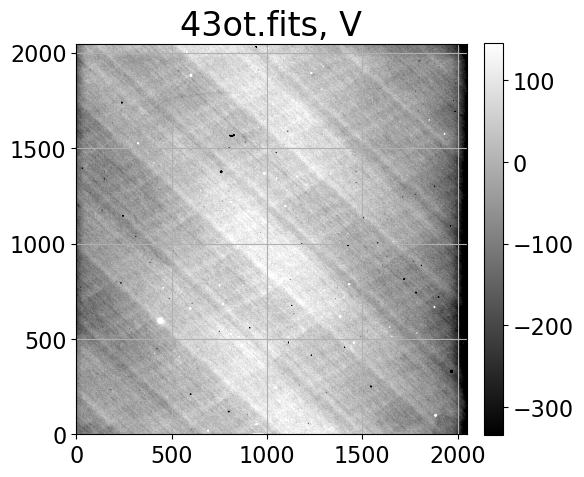

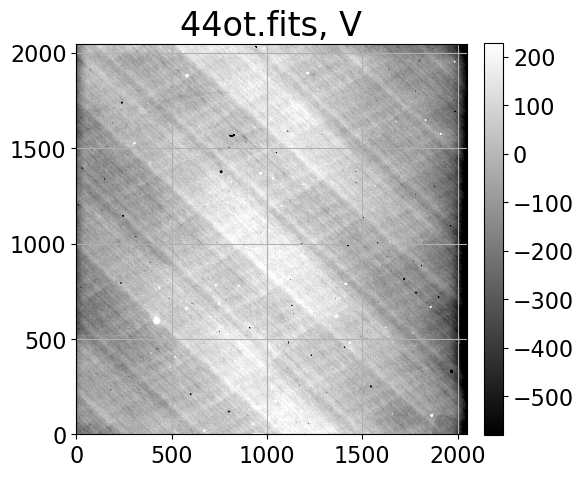

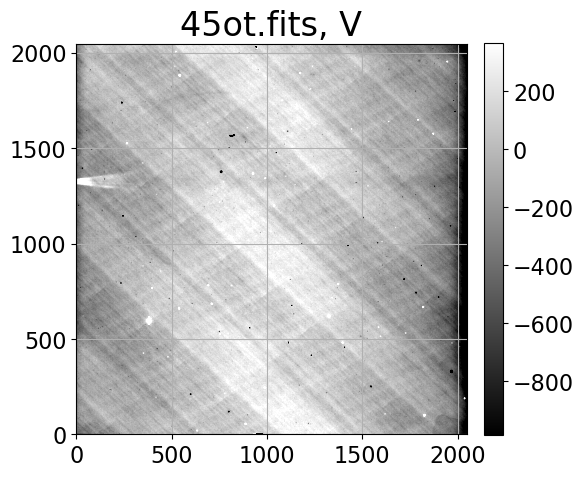

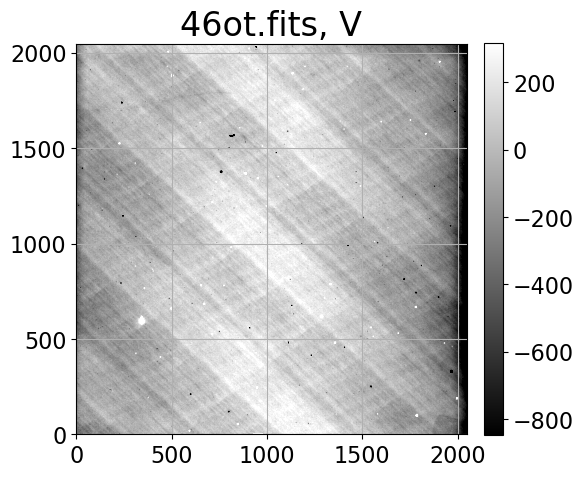

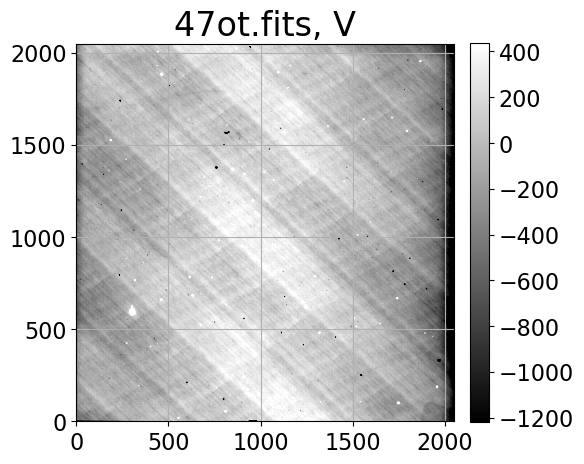

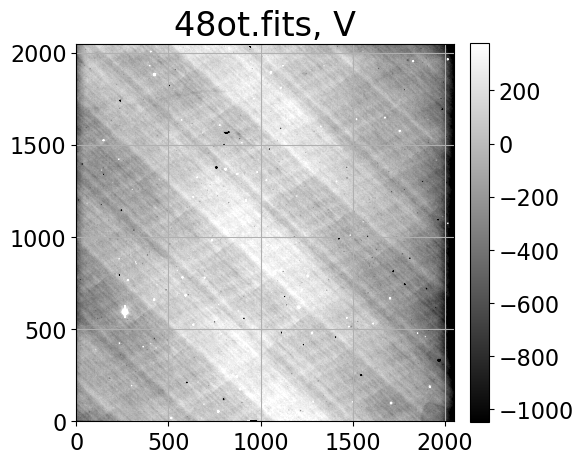

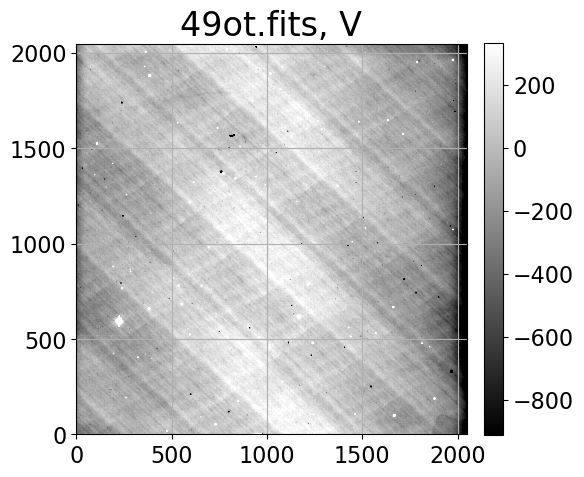

In [185]:
vflats_a = [CCDData.read(v_files_a[i],unit='adu') for i in range(len(v_files_a))] # this is how CCDPROC reads in each fits image
print(np.shape(vflats_a))

for i, flat in enumerate(vflats_a):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    show_image(flat.data, cmap='gray', ax=ax, fig=fig)
    ax.set_title(v_files_a[i][-9:]+', V') # index filename to exclude long directory
    plt.tight_layout()
    plt.show()

Here, we will be checking to see if there is a difference between the straight average, mean, and median values of all of the V flat images. We will also be showing the observation times. 

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


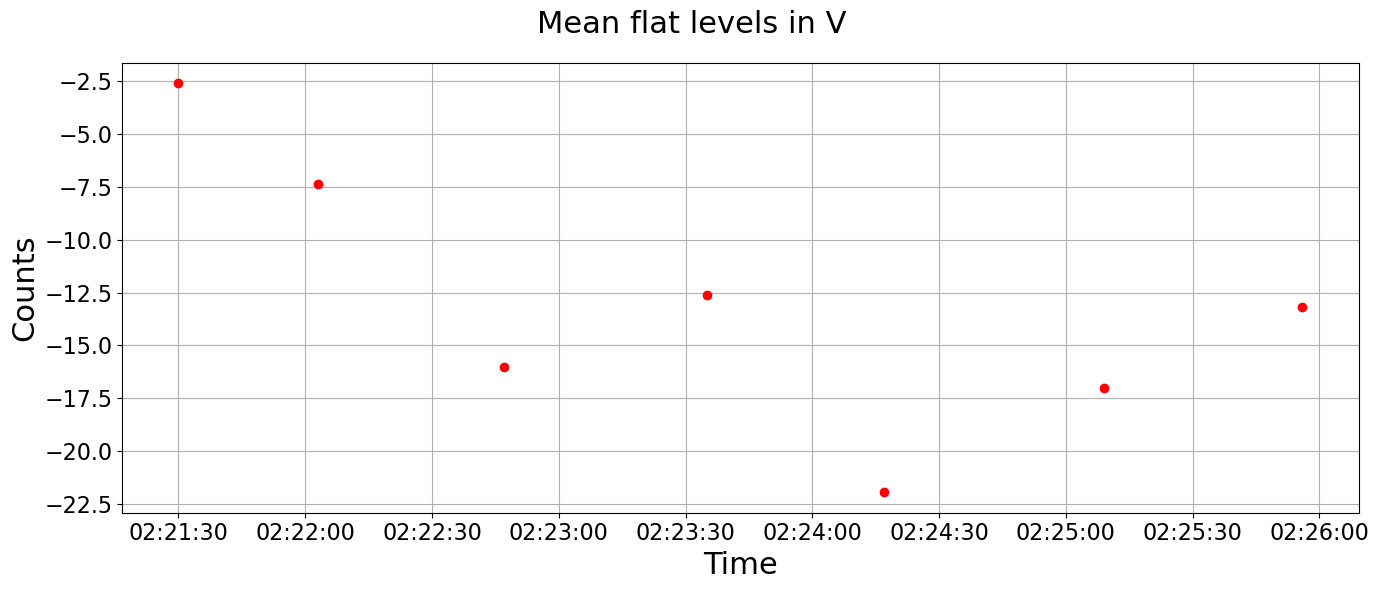

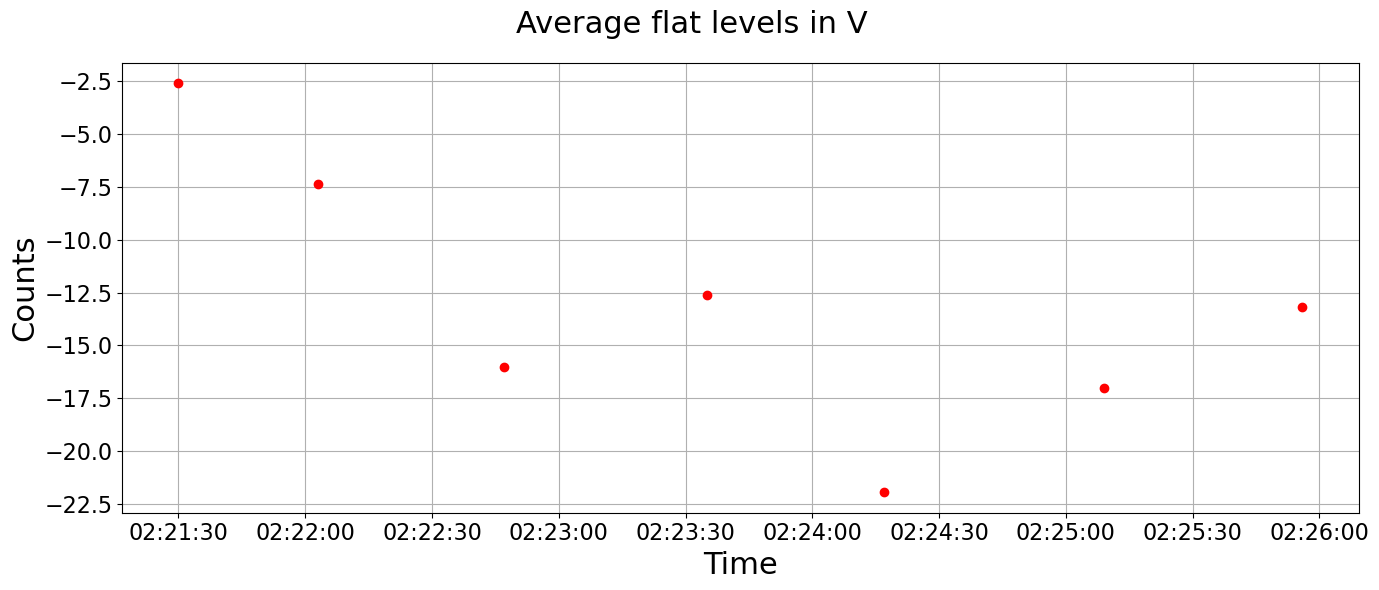

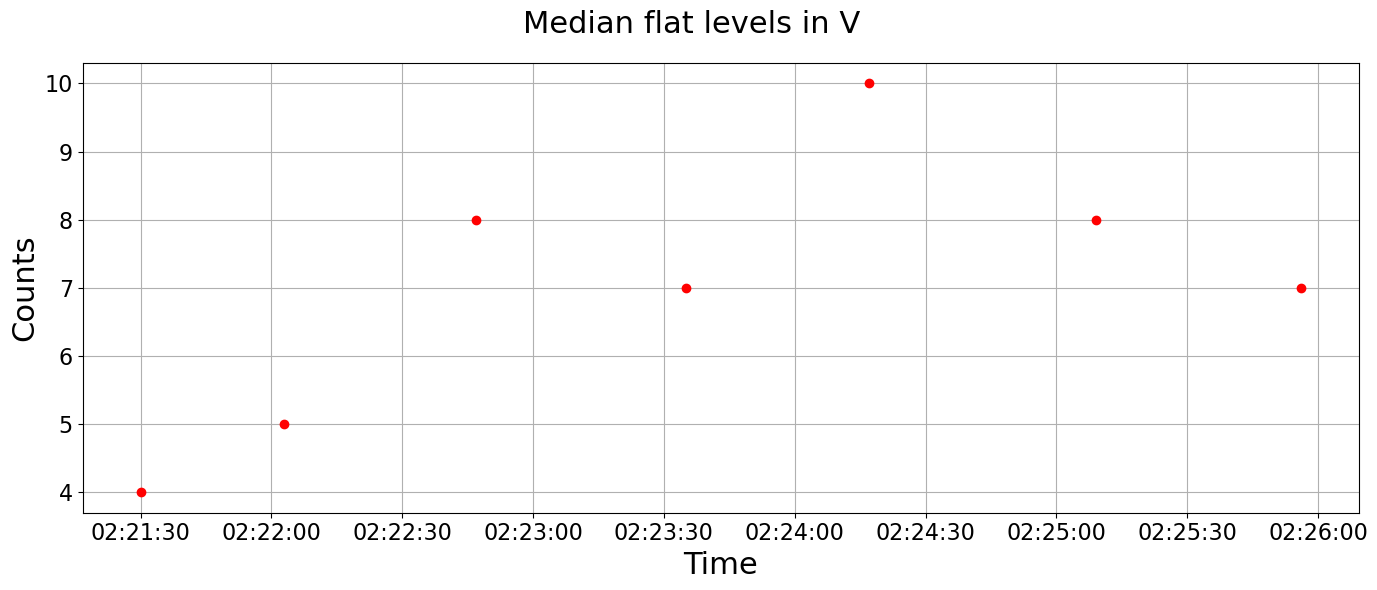

In [237]:
times = imgs_a.filter(imagetyp='skyflat',filter='V').summary['date-obs'].data.data 
flat_times = [datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.%f') for time in times] # these are nicely formatted for plotting


vflat_b  = [CCDData.read(v_files_a[i],unit='adu') for i in range(len(v_files_a))] 

#calculating the raw mean, average, and median values for each image.
vflat_b_mean  = [np.mean(vflat_b[i]) for i in range(len(vflat_b))]
vflat_b_average = [np.average(vflat_b[i]) for i in range(len(vflat_b))]
vflat_b_median = [np.median(vflat_b[i]) for i in range(len(vflat_b))]

vflat_mn = np.ones_like(flat_times)*vflat_b_mean
vflat_average = np.ones_like(flat_times)*vflat_b_average
vflat_md = np.ones_like(flat_times)*vflat_b_median


# making the plots
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(flat_times,vflat_mn,'red',marker='o',ls='')
ax.set_xlabel(r'Time',fontsize=22)
ax.set_ylabel(r'Counts',fontsize=22)
fig.suptitle('Mean flat levels in V', fontsize=22)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(flat_times,vflat_average,'red',marker='o',ls='')
ax.set_xlabel(r'Time',fontsize=22)
ax.set_ylabel(r'Counts',fontsize=22)
fig.suptitle('Average flat levels in V', fontsize=22)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(flat_times,vflat_md,'red',marker='o',ls='')
ax.set_xlabel(r'Time',fontsize=22)
ax.set_ylabel(r'Counts',fontsize=22)
fig.suptitle('Median flat levels in V', fontsize=22)
fig.tight_layout()
plt.show()

In [209]:
scale  = np.array(vflat_mn) #the scaling makes it a value near 1, not the weighting. 
scales = np.ones_like(vflat_b)*scale[:,np.newaxis,np.newaxis]

In [217]:
# weighted mean, average, and median values  
flat_wt_mn  = np.sum(scales*vflat_b,axis=0)/np.sum(scale)                
flat_wt = np.average(vflat_b,axis=0,weights=scales/np.sum(scale))    # to 1d-12 (numerical noise)
flat_wt_md = np.median(vflat_b,axis=0)

Though not entirely necessary, I did want to show what the minimum and maximum values were for the weighted mean. These values can change depending on what sigma value we are willing to clip off from the data. Clipping up to 5-sigma will maintain more outlier values than clipping up to 3-sigma, for example. 

In [235]:
a = []
for k in flat_wt_mn:
    for l in k:
        a.append(l)
        
min_flat_wt_mn = (min(a)) #-27523.545511157346
max_flat_wt_mn = (max(a)) #21068.054783345375
print(min_flat_wt_mn, max_flat_wt_mn) 

print(scale) #This is an array of the mean values. 
#print(scales)

-27523.545511157346 21068.054783345375
[-2.6017643006533953 -7.37326608871214 -16.011709447133 -12.63511197789448
 -21.949857308332316 -17.020320801019786 -13.203858018212628]


I was unable to make this plot work, however it would have shown what the weighted mean values were.

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

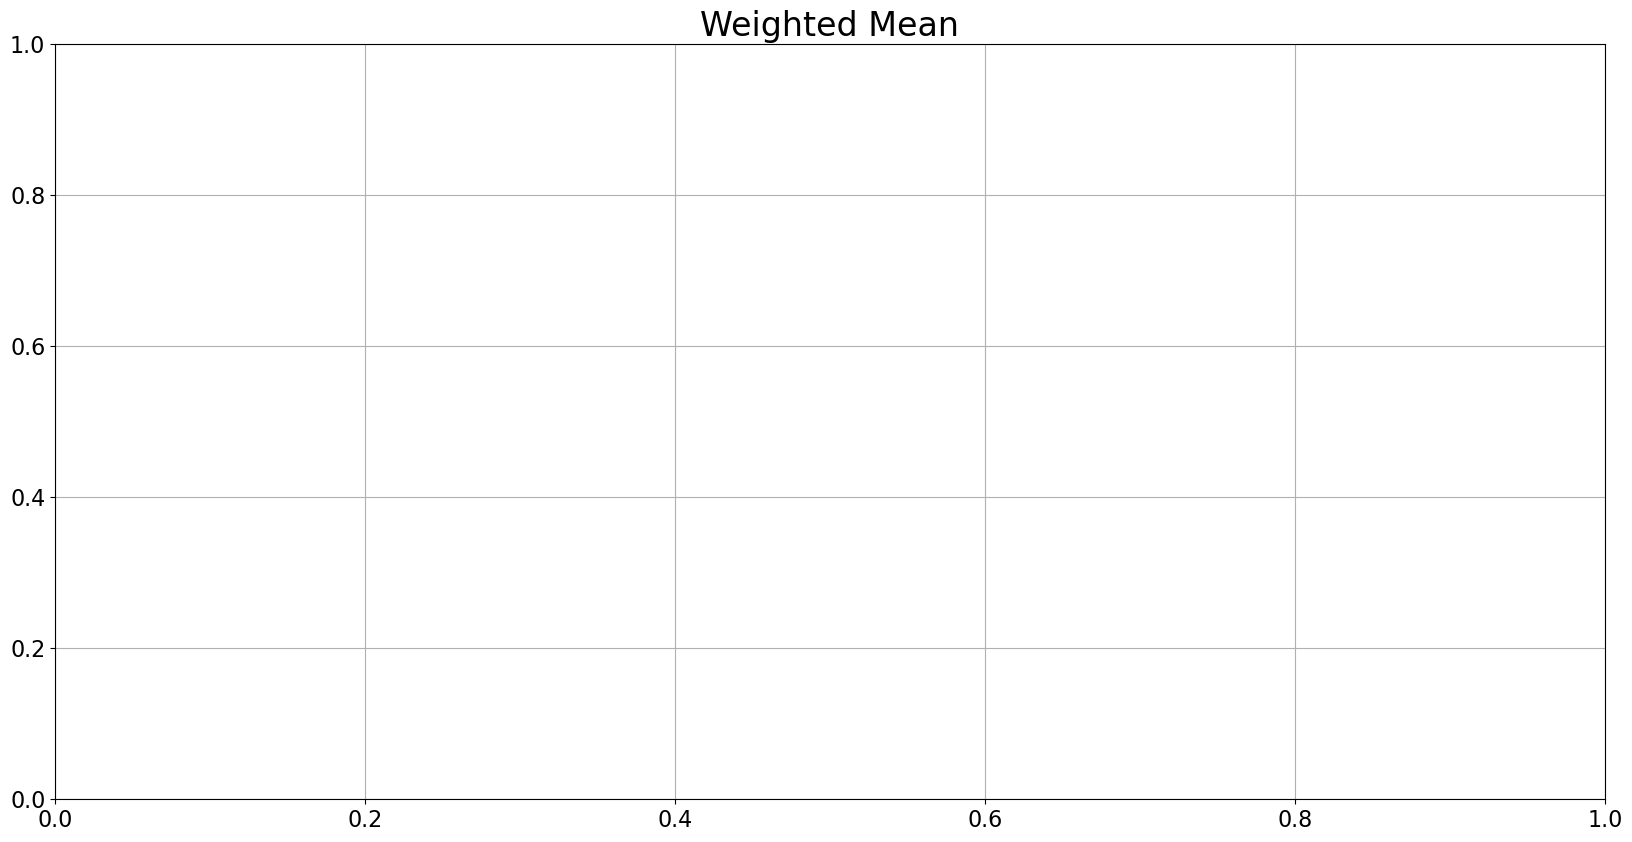

In [240]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_title('Weighted Mean')
show_image(flat_wt_mn, cmap='gray', ax=ax, fig=fig)
plt.tight_layout()
plt.show()

I believe a combination of the strategies listed above is best for astronomical data. I believe sigma clipping is significant and works well enough to remove extremely over-exposed pixels (due to cosmic rays, for example). I also believe more weight should be given to flat fields with higher count rates, since those probably also represent more pixels that have been over-exposed than those with lower count rates. 

# Number 3:

## MASTER FLATS

Now, we will use a similar process that we did for combining biases into one master bias, except we will be combining flat field images into one master flat image with respect to their filters. 

In [177]:
halpha_master = imgs_a.files_filtered(imagetyp='skyflat', filter='halpha', include_path=True)
combined_bias_halpha = ccdp.combine(halpha_master,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )
combined_bias.meta['combined'] = True
combined_bias.write(reduced_dir+'combined_bias_halpha.fit', overwrite = True)

INFO:astropy:splitting each image into 9 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 9 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


In [178]:
u_master = imgs_a.files_filtered(imagetyp='skyflat', filter='U', include_path=True)
combined_bias_u = ccdp.combine(u_master,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )
combined_bias.meta['combined'] = True
combined_bias.write(reduced_dir+'combined_bias_u.fit', overwrite = True)

INFO:astropy:splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


In [179]:
b_master = imgs_a.files_filtered(imagetyp='skyflat', filter='B', include_path=True)
combined_bias_b = ccdp.combine(b_master,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )
combined_bias.meta['combined'] = True
combined_bias.write(reduced_dir+'combined_bias_b.fit', overwrite = True)

INFO:astropy:splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


In [180]:
v_master = imgs_a.files_filtered(imagetyp='skyflat', filter='V', include_path=True)
combined_bias_v = ccdp.combine(v_master,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )
combined_bias.meta['combined'] = True
combined_bias.write(reduced_dir+'combined_bias_v.fit', overwrite = True)

INFO:astropy:splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


In [181]:
r_master = imgs_a.files_filtered(imagetyp='skyflat', filter='R', include_path=True)
combined_bias_r = ccdp.combine(r_master,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )
combined_bias.meta['combined'] = True
combined_bias.write(reduced_dir+'combined_bias_r.fit', overwrite = True)

INFO:astropy:splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


In [182]:
i_master = imgs_a.files_filtered(imagetyp='skyflat', filter='I', include_path=True)
combined_bias_i = ccdp.combine(i_master,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )
combined_bias.meta['combined'] = True
combined_bias.write(reduced_dir+'combined_bias_i.fit', overwrite = True)

INFO:astropy:splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


# Number 4:

Here, we will be normalizing each master flat image by taking the individual data and dividing by the mean of that data. 

In [243]:
halpha_imgsa_file = reduced_dir+'combined_bias_halpha.fit'
halpha_imgsa_hdus = fits.open(halpha_imgsa_file)
halpha_imgsa = halpha_imgsa_hdus[0].data
halpha_imgsa_hdrs = halpha_imgsa_hdus[0].data

u_imgsa_file = reduced_dir+'combined_bias_u.fit'
u_imgsa_hdus = fits.open(u_imgsa_file)
u_imgsa = u_imgsa_hdus[0].data
u_imgsa_hdrs = u_imgsa_hdus[0].data

b_imgsa_file = reduced_dir+'combined_bias_b.fit'
b_imgsa_hdus = fits.open(b_imgsa_file)
b_imgsa = b_imgsa_hdus[0].data
b_imgsa_hdrs = b_imgsa_hdus[0].data

v_imgsa_file = reduced_dir+'combined_bias_v.fit'
v_imgsa_hdus = fits.open(v_imgsa_file)
v_imgsa = v_imgsa_hdus[0].data
v_imgsa_hdrs = v_imgsa_hdus[0].data

r_imgsa_file = reduced_dir+'combined_bias_r.fit'
r_imgsa_hdus = fits.open(r_imgsa_file)
r_imgsa = r_imgsa_hdus[0].data
r_imgsa_hdrs = r_imgsa_hdus[0].data

i_imgsa_file = reduced_dir+'combined_bias_i.fit'
i_imgsa_hdus = fits.open(i_imgsa_file)
i_imgsa = i_imgsa_hdus[0].data
i_imgsa_hdrs = i_imgsa_hdus[0].data

In [246]:
norm_halpha = halpha_imgsa/np.mean(halpha_imgsa)
norm_u = u_imgsa/np.mean(u_imgsa)
norm_b = b_imgsa/np.mean(b_imgsa)
norm_v = v_imgsa/np.mean(v_imgsa)
norm_r = r_imgsa/np.mean(r_imgsa)
norm_i = i_imgsa/np.mean(i_imgsa)

# Number 5:

We will divide the science frames by the normalized flat fields. We will do this by using for loops for each filter.

In [247]:
imgs_b = ccdp.ImageFileCollection(reduced_dir, glob_include='*otz.fits')

In [254]:
for ccd, file_name in imgs_b.ccds(imagetyp='science',filter='U', return_fname=True):
    div = ccd.data/norm_u
    outfile = file_name.strip('.fits')+'otz.fits'
    ccd.write(reduced_dir + outfile, overwrite=True)
    
for ccd, file_name in imgs_b.ccds(imagetyp='science',filter='B', return_fname=True):
    div = ccd.data/norm_b
    outfile = file_name.strip('.fits')+'otz.fits'
    ccd.write(reduced_dir + outfile, overwrite=True)
    
for ccd, file_name in imgs_b.ccds(imagetyp='science',filter='V', return_fname=True):
    div = ccd.data/norm_v
    outfile = file_name.strip('.fits')+'otz.fits'
    ccd.write(reduced_dir + outfile, overwrite=True)
    
for ccd, file_name in imgs_b.ccds(imagetyp='science',filter='R', return_fname=True):
    div = ccd.data/norm_r
    outfile = file_name.strip('.fits')+'otz.fits'
    ccd.write(reduced_dir + outfile, overwrite=True)
    
for ccd, file_name in imgs_b.ccds(imagetyp='science',filter='I', return_fname=True):
    div = ccd.data/norm_i
    outfile = file_name.strip('.fits')+'otz.fits'
    ccd.write(reduced_dir + outfile, overwrite=True)
    
for ccd, file_name in imgs_b.ccds(imagetyp='science',filter='halpha', return_fname=True):
    div = ccd.data/norm_halpha
    outfile = file_name.strip('.fits')+'otz.fits'
    ccd.write(reduced_dir + outfile, overwrite=True)

/Users/jonathanrodriguez/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/jonathanrodriguez/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/jonathanrodriguez/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/jonathanrodriguez/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/jonathanrodriguez/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/jonathanrod

# Number 6:

Finally, we will compute the gain and read noise using the normalized master flat images with the bias images.

$Gain = \frac{ (F_{1}+F_{2}) - (B_{1}+B_{2})} { \sigma^{2}_{F_{1}+F_{2}} - \sigma^{2}_{B_{1}+B_{2}} }$.

$Read Noise = \frac{Gain - \sigma_{B_{1}+B_{2} } }{ \sqrt{2} }$.

In [ ]:
bias_6 = imgs_ot.files_filtered(imagetyp='bias', filter='none', include_path=True)
Gain = ((norm_v[0] + norm_v[1])-(bias_6[0] + bias_6[1]))/((np.std(norm_v[0] + norm_v[1]))**2-(np.std(bias_6[0] + bias_6[1]))**2)
Read_noise = (Gain - (np.std(bias_6[0] + bias_6[1])))/(np.sqrt(2))